# Analysis of 'Entertainment through CleverCogs'
group: 5

name: Yijia Zhang


## Describe
Our group analyses the data of CleverCogs, an online entertainment Games, Music and Information for older and disabled people using.     
There are three original data files named `CCData2018-2021`, `User2021`, `CustomerMedicalConditions`.

#### `CCData2018-2021` 
**Summary**: 654915 user's behavior dataset between January 2018 and November 2021.    
**Data type**: tabular  
**Rows**: 654915 rows, each row representing one user action.   
**Columns**: 9 columns. Which is `Time`, `VisitorID`, `ExternalID`, `Role`, `Location`, `Link Title`, `Link Type`, `ContentInfo`, `URL`    
**Value Type**: String.   
**Time Frame**: There is data here going back to January 2018 until November 2021.   
**Links**: This file can use 'External ID' to link to `User2021` and `CustomerMedicalConditions`, and use 'Visiter ID' to link to `User2021`.   
 
#### `User2021`
**Summary**: 3641 user information dataset in 2021     
**Data type**: tabular   
**Rows**: 3641 rows of data, each row representing one user's information      
**Columns**: 6 columns. Which is `User ID`, `VisitorID`, `External ID`, `Birth date`, `Gender`, `Location`       
**Value Type**: String.    
**Time Frame**: The data in this file only show the user still alive in 2021.   
**Links**: This file can use 'External ID' to link to `CCData2018-2021` and `CustomerMedicalConditions`, and use 'Visiter ID' to link to `CCData2018-2021`.    


#### `CustomerMedicalConditions` 
**Summary**: 1312 user health status dataset    
**Data type**: tabular    
**Rows**: 1312 rows of data, each row representing one user's helath information (one user may have several rows)    
**Columns**: 7 columns. Which is `External ID`, `CleverCogsUserId`, `Gender`, `DateOfBirth`, `Age`, `StaffPlanConditions`, `CareSysCondition`    
**Value Type**: String.     
**Time Frame**: The data in this file only show the user still alive in 2021.    
**Links**: This file can use 'External ID' to link to `CCData2018-2021` and `User2021`.     
 
In my group, we divide `CCData2018-2021` into 5 parts depending on the city-lockdown period. My data period is 8 March 2021 to date, phase seven of lockdown, the steps out of lockdown. Firstly, we want to find out that in each period the relationships and distributions between activity and user's information individually. And then in Assessment3, we will compare the difference among each period in a variety of aspects from everyone.     

## Data Clean
### Data cleaning in Excel

#### `CCData2018-2021` 
**Delete other period**:As we each analyse specific time periods so the first step is to use Excel to delete the data in other time periods.    
**Delete 'VisitorID'**: As all three files have an 'External ID', data holder say we can only use 'External ID' to link three files. So, 'Visitor ID' is useless.     
**Delete 'ContentInfo'**: most data in 'ContentInfo' are NULL, and others are almost the same as 'Link Title', so 'ContentInfo' is meaningless.  


#### `CustomerMedicalConditions` 
**Delete 'CleverCogsUserId'**: As all three files have an 'External ID', data holder say we can only use 'External ID' to link three files. So, 'CleverCogsUserId' is useless.    
**Delete 'DateOfBirth'**: there is 'Age' in this dataset, and 'Age' is much more direct to read than 'DateOfBirth', so, 'DateOfBirth' is repeat information.     

#### `User2021`
**Delete whole file**: this dataset is user's basic information including 'Birth date', 'Gender', 'Location'. `CustomerMedicalConditions`  also has 'Birth date' and 'Gender',  `CCData2018-2021` has 'Location'. So other two dataset contains all the information from this dataset.

### Data cleaning by Python
#### loading two datasets

In [1]:
# import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
#Convert two Excel files into CSV files, uploading to notebook and loading the files.
CCDate_2021_Data = pd.read_csv("CCDate2018-2021-3-8.csv")
CMC_2021_Data = pd.read_csv("CustomerMedicalConditions04Nov21.csv")

#### Clean `CCData2018-2021`
**Delete data other than 'user' in 'Role'**: Our goal is to analyse user, so need to clean 'employee' etc.      
**Delete 'NULL' in 'ExternalID'**: Data holder says that NULL could be an operation requested by the system or just by chance, so it is pointless to analyse.      
**Dataframe name**: `CCDate_2021_Data_ClRole_ClEx`

In [3]:
# Delete data other than 'user' in 'Role'
Role_notUser_list=[]
for x in range(len(CCDate_2021_Data.index)):
    if CCDate_2021_Data.iloc[x,2] !='User':
#         print(CCDate_2021_Data.iloc[x,2])
        Role_notUser_list.append(x)
# print(Role_notUser_list)
CCDate_2021_Data_ClRole=CCDate_2021_Data.drop(Role_notUser_list)
print('done')
CCDate_2021_Data_ClRole

done


,Time,ExternalID,Role,Location,LinkTitle,LinkType,URL
0,11/1/21 5:10 PM,5325.0,User,Broom Court,Comfort Break,Services,LIST
1,11/1/21 5:10 PM,5325.0,User,Broom Court,Ask For,Category,NaN
2,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care Team,Category,NaN
3,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care,Category,NaN
4,11/1/21 5:07 PM,5325.0,User,Broom Court,Family & Friends,Internet,contacts.asp
...,...,...,...,...,...,...,...
134580,3/8/21 12:54 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134581,3/8/21 12:53 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134582,3/8/21 12:49 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134583,3/8/21 12:42 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/


In [4]:
#Delete 'NULL' in 'ExternalID'
CCDate_2021_Data_ClRole_ClEx = CCDate_2021_Data_ClRole.dropna(axis = 0, subset = ['ExternalID'])
print('done')
CCDate_2021_Data_ClRole_ClEx

done


,Time,ExternalID,Role,Location,LinkTitle,LinkType,URL
0,11/1/21 5:10 PM,5325.0,User,Broom Court,Comfort Break,Services,LIST
1,11/1/21 5:10 PM,5325.0,User,Broom Court,Ask For,Category,NaN
2,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care Team,Category,NaN
3,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care,Category,NaN
4,11/1/21 5:07 PM,5325.0,User,Broom Court,Family & Friends,Internet,contacts.asp
...,...,...,...,...,...,...,...
134580,3/8/21 12:54 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134581,3/8/21 12:53 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134582,3/8/21 12:49 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/
134583,3/8/21 12:42 AM,9080.0,User,Responder Service,Google,Internet,https://www.google.co.uk/


#### Clean `CustomerMedicalConditions04Nov21`
**Delete duplicate data in 'External ID'**: I find that some 'External ID' have several rows, because they have several 'StaffPlanConditions'. So I creat a new dataframe that each 'External ID' has only one row.      
**Dataframe name**: `CMC_2021_Data`, `CMC_2021_Data_OnlyID`

In [5]:
# I find that some 'External ID' have several rows
ID_counts = CMC_2021_Data['ExternalID'].value_counts()
print(ID_counts)

# Delete duplicate data in 'External ID'
CMC_2021_Data_OnlyID = CMC_2021_Data.drop_duplicates(['ExternalID'])
CMC_2021_Data_OnlyID

9252    11
9277    10
8305     8
8233     8
8698     7
        ..
5820     1
5819     1
5818     1
5817     1
9605     1
Name: ExternalID, Length: 1214, dtype: int64


,ExternalID,Gender,Age,StaffPlanConditions,CareSysCondition
0,4703,F,56.0,NaN,Spina Bifida
1,4704,F,81.0,NaN,COPD
2,4706,F,90.0,NaN,Dementia
3,4707,F,39.0,NaN,Brain Injury
4,4708,F,90.0,NaN,NaN
...,...,...,...,...,...
1306,9586,F,89.0,Dementia ...,NaN
1307,9594,M,73.0,Multiple Sclerosis ...,NaN
1308,9600,M,69.0,NaN,NaN
1309,9604,M,73.0,NaN,COPD


#### Merge `CCData2018-2021` and `CustomerMedicalConditions04Nov21`
Using 'External ID' to merge `CCDate_2021_Data_ClRole_ClEx` and `CMC_2021_Data_OnlyID`. So that the user information in `CustomerMedicalConditions` can be compared when analysing the user behaviour in `CCData2018-2021`.  

I use 'inner merge', because if we need to analyse both 'user behaviour' and 'user information', the data need to has those two information. So 'inner merge' can filter out data containing those two information.

**Dataframe name**: `CCDate_CMC_2021_inner`

In [6]:
# inner merge CCDate_2021_Data_ClRole_ClEx and CMC_2021_Data_OnlyID
CCDate_CMC_2021_inner = pd.merge(CCDate_2021_Data_ClRole_ClEx, CMC_2021_Data_OnlyID, on='ExternalID', how='inner')
print('done')
CCDate_CMC_2021_inner

done


,Time,ExternalID,Role,Location,LinkTitle,LinkType,URL,Gender,Age,StaffPlanConditions,CareSysCondition
0,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,M,58.0,NaN,Cancer
1,11/1/21 5:08 PM,8899.0,User,67 Glamis Road,My Care,Category,NaN,M,58.0,NaN,Cancer
2,10/29/21 3:57 PM,8899.0,User,67 Glamis Road,Care Notes,Internet,notes.asp,M,58.0,NaN,Cancer
3,10/29/21 3:57 PM,8899.0,User,67 Glamis Road,My Care,Category,NaN,M,58.0,NaN,Cancer
4,10/22/21 4:01 PM,8899.0,User,67 Glamis Road,Care Notes,Internet,notes.asp,M,58.0,NaN,Cancer
...,...,...,...,...,...,...,...,...,...,...,...
93478,3/17/21 10:11 AM,8772.0,User,National,Online Radio Box,Internet,https://onlineradiobox.com/uk/,M,41.0,NaN,Amputee
93479,3/17/21 10:11 AM,8772.0,User,National,Radio Stations,Category,NaN,M,41.0,NaN,Amputee
93480,3/17/21 10:11 AM,8772.0,User,National,Entertainment,Category,NaN,M,41.0,NaN,Amputee
93481,3/12/21 8:14 PM,8872.0,User,Menzieshill C@H,My Care Team,Category,NaN,M,74.0,NaN,Dementia


### Clean Summary
After cleaning the data, I will use 4 dataframe.    
`CCDate_2021_Data_ClRole_ClEx`: User behaviour dataframe that contains only ‘user’ dataset and removes 'External ID' is 'NULL'.       
`CMC_2021_Data`: User basic and health information dataframe.       
`CMC_2021_Data_OnlyID`: User basic and health information dataframe that each 'External ID' has only one row.      
`CCDate_CMC_2021_inner`: User behaviour dataframe with user basic and health information.    


## Explore
I found 7 exploratory visualisations and 4 relationships between variables analysed.

### Exploratory Visualisations
#### User's basic information analysis
First, analyse user's basic information in dataframe `CMC_2021_Data` and `CMC_2021_Data_OnlyID`

**Age distribution**      
`CMC_2021_Data_OnlyID` each ID have one row      

Almost normal distribution, to be more precise, left skewed. From the boxplot, most user are around the 60-90. So the main user is Elderly people.

Several outliers under 10 years of age exist here.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


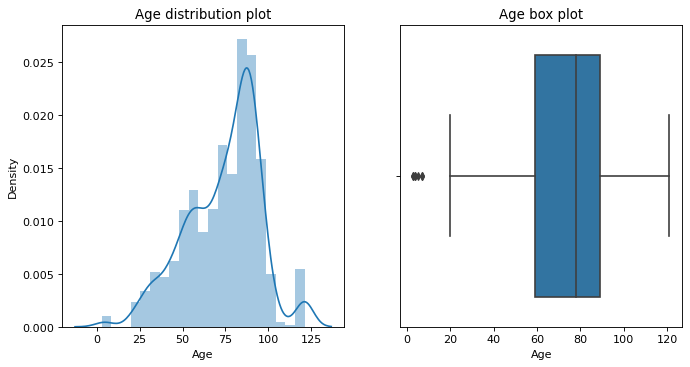

In [7]:
# Age distribution
pic = plt.figure(figsize=(10,5),dpi=80) 
fig1 = pic.add_subplot(1,2,1)
age_displot = sns.distplot(CMC_2021_Data_OnlyID['Age'])
age_displot.set_title('Age distribution plot')
fig2 = pic.add_subplot(1,2,2)
age_boxplot = sns.boxplot(CMC_2021_Data_OnlyID['Age'])
age_boxplot.set_title('Age box plot')
plt.show()

In [8]:
# Method of showing both values and percentages in a pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

**Gender distribution**      
`CMC_2021_Data_OnlyID` each ID have one row   

Female user more than male user.

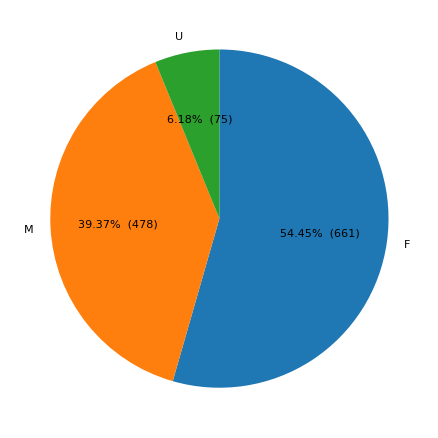

In [9]:
# Gender distribution
pic = plt.figure(figsize=(7,7),dpi=80)
gender_counts = CMC_2021_Data_OnlyID['Gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(gender_counts));
plt.show()

**CareSysCondition distributon**     
`CMC_2021_Data_OnlyID` each ID have one row   

Most care condition are 'Elderly Care/support', and 'Dementia' (elderly disease) is the second, so elderly people are the main users. In addition, beacuse user who only require 'Elderly Care/support' rank the first, maybe the largest user group is healthy elderly people.

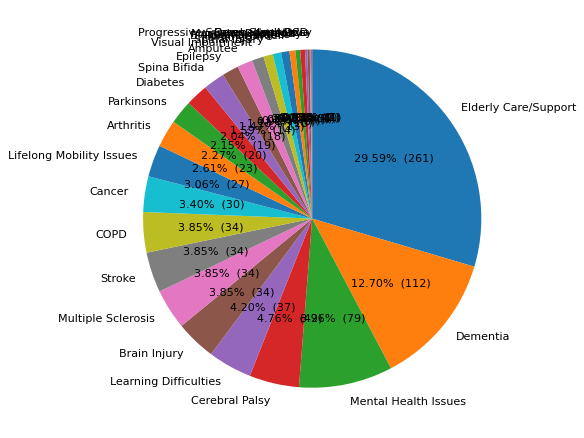

In [10]:
# CareSysCondition distributon
pic = plt.figure(figsize=(7,7),dpi=80)
CSC_counts = CMC_2021_Data_OnlyID['CareSysCondition'].value_counts()
plt.pie(CSC_counts, labels = CSC_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(CSC_counts));
plt.show()

**StaffPlanConditions distributon**     
`CMC_2021_Data` each StaffPlanConditions have one row (some ID have many row)     

‘Poor mobility', 'Visual impairment', 'Skin issues', 'Hearing impairment' and 'Dementia' are top 5, these five disease are very common diseases of the elderly in common sense.

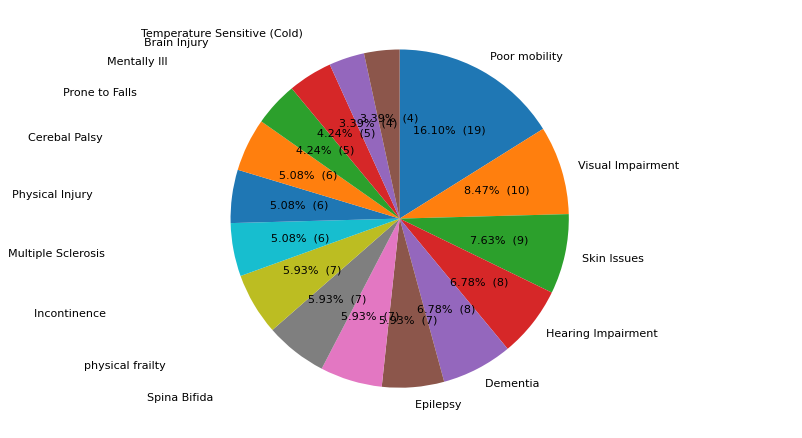

In [11]:
# StaffPlanConditions distributon
pic = plt.figure(figsize=(7,7),dpi=80)
SPC_counts = CMC_2021_Data['StaffPlanConditions'].value_counts()
SPC_counts_clean=SPC_counts[SPC_counts>3] #Too small data filtered out, too small data not clearly displayed in the pie chart
plt.pie(SPC_counts_clean, labels = SPC_counts_clean.index, startangle = 90, counterclock = False, autopct=make_autopct(SPC_counts_clean));
plt.show()
# print(SPC_counts)

#### User's behaviour analysis
Second, analyse user's behaviour in dataframe `CCDate_2021_Data_ClRole_ClEx` and `CCDate_CMC_2021_inner`

**Usage of each ExternalID**     
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row    

The chart shows a wide variation in user usage between 8 March 2021 and 1 November 2021. There were nine users with more than 5,000 users, and ID 5535 even exceeded 15,000.

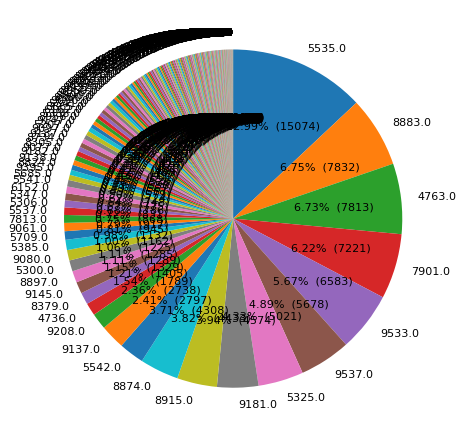

In [12]:
# Usage of each ExternalID 
pic = plt.figure(figsize=(7,7),dpi=80)
ExternalID_counts = CCDate_2021_Data_ClRole_ClEx['ExternalID'].value_counts()
plt.pie(ExternalID_counts, labels = ExternalID_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(ExternalID_counts));
plt.show()

**LinkType Distribution**     
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row    

We can easily find that 'internet' and 'category' are much more than others. The platform's main functions are based around these two points.

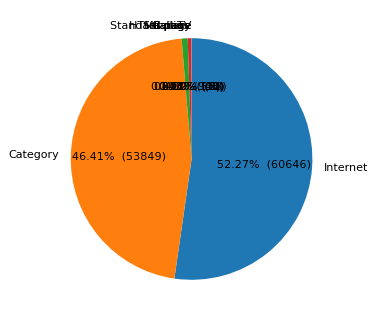

Internet         60646
Category         53849
Radio              943
Services           538
Standard page       30
HTML page           12
Gallery              5
TV                   2
Name: LinkType, dtype: int64


In [13]:
# LinkType Distribution
pic = plt.figure(figsize=(5,5),dpi=80)
LinkType_counts = CCDate_2021_Data_ClRole_ClEx['LinkType'].value_counts()
plt.pie(LinkType_counts, labels = LinkType_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(LinkType_counts));
plt.show()
print(LinkType_counts)

**LinkTitle Distribution**     
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row    

Roughly half of the top five most represented figures are about 'Care' and the other half are about 'Entertainment', which can also find that the platform's main functions are based around 'Care' and 'Entertainment'.

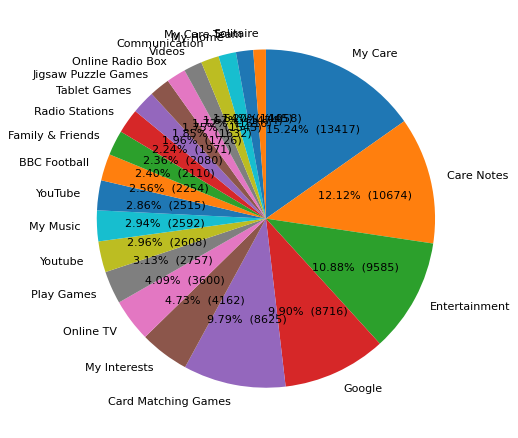

In [14]:
# LinkTitle Distribution
pic = plt.figure(figsize=(7,7),dpi=80) 
LinkTitle_counts = CCDate_2021_Data_ClRole_ClEx['LinkTitle'].value_counts()
a=LinkTitle_counts[LinkTitle_counts>1000] # Cleaning out too small data
plt.pie(a, labels = a.index, startangle = 90, counterclock = False, autopct=make_autopct(a))
plt.show()

**Location Distribution**     
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row    

The five regions with the highest levels of activity are `St Leonards Court`, `Aberdeen C@H`, `Belses Gardens`, `Responder Service`, `Menzieshill C@H`.       

I search these place on Google map, `St Leonards Court` is in Edinburgh, `Aberdeen C@H` is in Aberdeen, `Belses Gardens` and `Responder Service` are in Glasgow, `Menzieshill C@H` is in Dundee. Those 4 cities are the main city.

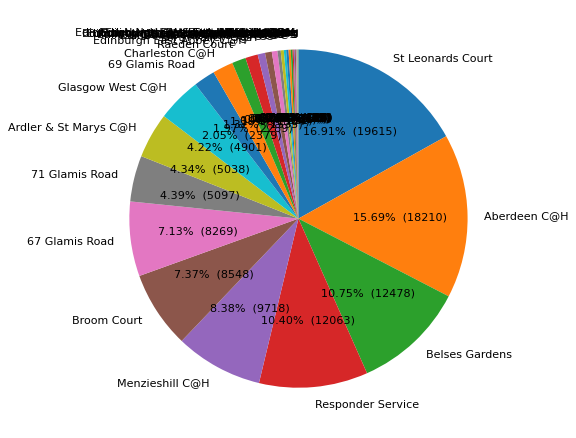

In [15]:
# Location Distribution
pic = plt.figure(figsize=(7,7),dpi=80) 
Location_counts = CCDate_2021_Data_ClRole_ClEx['Location'].value_counts()
plt.pie(Location_counts, labels = Location_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(Location_counts));
plt.show()

### Relationships between Variables Analysed
Since all value except 'Age' are of String type, the analysis of the relationship between variables is based on grouping some data and comparing them crosswise.

**Usage amount per month**    
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row      

By comparing the user usage for each month from March 2021 to November 2021, except for March and November 2021 where the data is incomplete, the user usage for the each months fluctuates very little, mostly around 15,000.

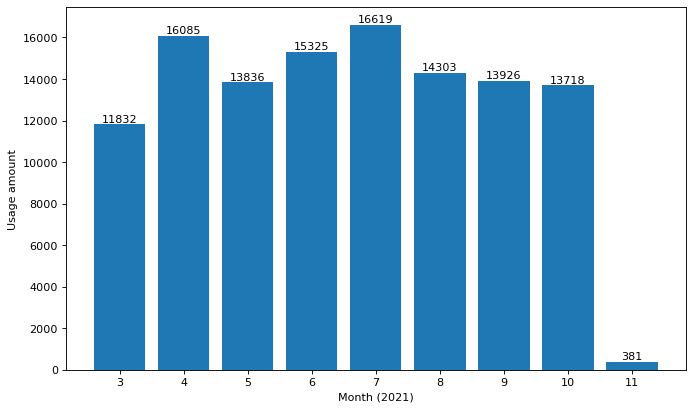

In [16]:
# Usage amount per month
pic = plt.figure(figsize=(10,6),dpi=80) 

Usage_amount_data_list = []
Usage_amount_month_list = []

# Identify the month and generate the dataset by identifying the beginning of the Time list string
for x in range(3, 12): 
    Usage_amount_data_list.append(len(CCDate_2021_Data_ClRole_ClEx[CCDate_2021_Data_ClRole_ClEx['Time'].str.startswith(str(x))]))
    Usage_amount_month_list.append(x)

plt.bar(range(len(Usage_amount_data_list)), Usage_amount_data_list, tick_label = Usage_amount_month_list)

plt.xlabel("Month (2021)")  # Set X-axis Y-axis name  
plt.ylabel("Usage amount") 

for a,b in zip(range(len(Usage_amount_data_list)),Usage_amount_data_list):  # Use text to display values 
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom',fontsize=10) 

plt.show()

**Usage amount by male and female per month**      
`CCDate_CMC_2021_inner` each behaviour have one row with basic information.         

In the same period and content as the previous chart, a comparison between the different genders has been added to this chart. Female users generally use more than male users, and combined with the previous analysis of 54.45% of female users, the reason for this phenomenon may be that there are more female users. However, the difference between male and female user in June is very significant.

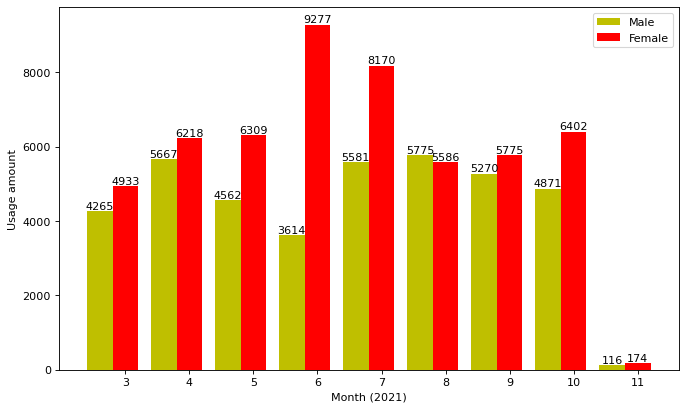

In [17]:
# Usage amount by male and female per month

pic = plt.figure(figsize=(10,6),dpi=80) 

Usage_amount_data_list_male = []
Usage_amount_data_list_female = []
Usage_amount_month_list = []

# Identify the month and gender and generate the dataset by identifying the beginning of the Time list string
for x in range(3, 12):
    a=CCDate_CMC_2021_inner[CCDate_CMC_2021_inner['Time'].str.startswith(str(x))]
    Usage_amount_data_list_male.append(len(a[a['Gender']=='M']))
    Usage_amount_data_list_female.append(len(a[a['Gender']=='F']))
    Usage_amount_month_list.append(x)

list_len =list(range(len(Usage_amount_data_list_male)))
total_width, n = 0.8, 2
width = total_width / n

plt.bar(list_len, Usage_amount_data_list_male, width=width, label='Male', fc = 'y')
for i in range(len(list_len)):
    list_len[i] = list_len[i] + width
plt.bar(list_len, Usage_amount_data_list_female, width=width, label='Female',tick_label = Usage_amount_month_list,fc = 'r')

plt.xlabel("Month (2021)")  # Set X-axis Y-axis name  
plt.ylabel("Usage amount") 

for a,b in zip(range(len(Usage_amount_data_list_male)),Usage_amount_data_list_male):  # Use text to display values 
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom',fontsize=10) 
    
for a,b in zip(range(len(Usage_amount_data_list_female)),Usage_amount_data_list_female):  # Use text to display values 
    plt.text(a+0.4, b+0.05, '%.0f' % b, ha='center', va='bottom',fontsize=10) 

plt.legend()
plt.show()

**Health condition for different age groups**      
`CMC_2021_Data_OnlyID` each ID have one row             

Health conditions are compared cross-sectionally for each age group of 10 years. I found that users older than 70 years are mainly 'Elderly care/support' or 'no condition (nan)'. The majority of users younger than 70 were those with health problems. Among the health problems of users younger than 70, 'Mental Health issues' is the most important problem.

Only one user younger than 10 have health peoblem.

(A pie chart is used here rather than a bar chart because it gives a clearer picture of the percentages. As the number of people in each age group is not necessarily the same, it is not meaningful to compare the number. Instead, it is more meaningful to compare the percentages.) 


<ipython-input-18-c00a240dd752>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(CSC_counts, labels = CSC_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(CSC_counts));


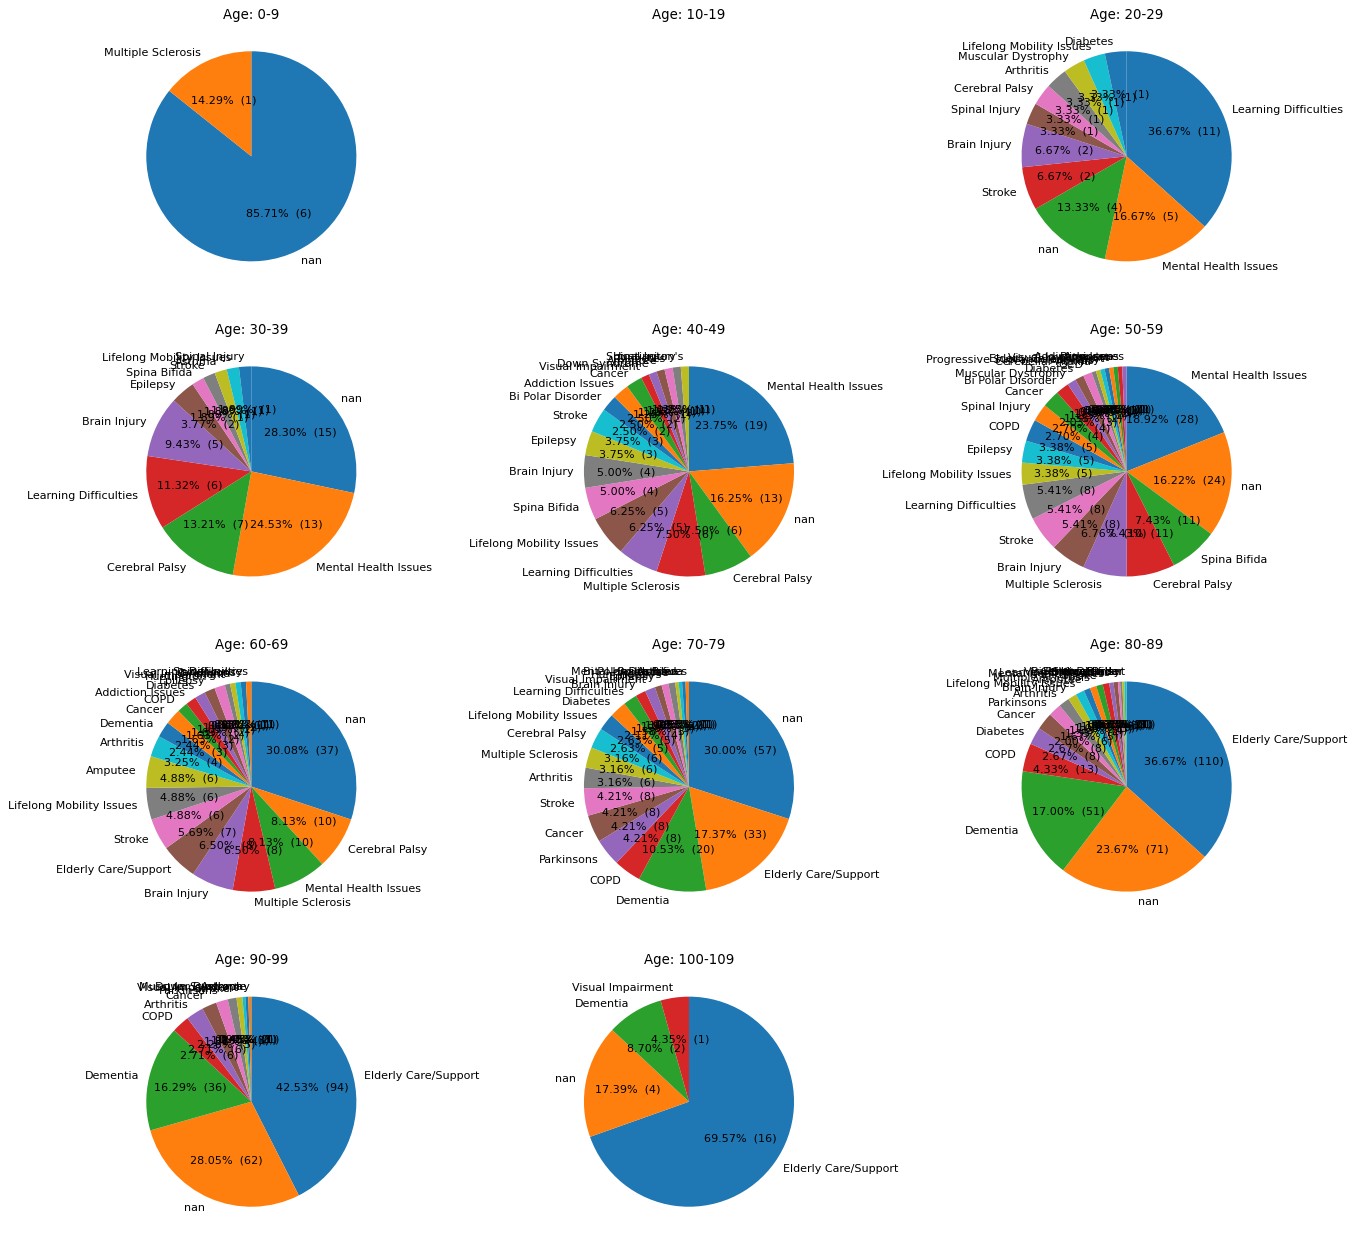

In [18]:
# Health condition for different age groups
pic2 = plt.figure(figsize=(20,20),dpi=80) 

x=0 # Age group
y=1 # Subplots

while x<110:
    a=CMC_2021_Data_OnlyID[(CMC_2021_Data_OnlyID['Age']>=x) & (CMC_2021_Data_OnlyID['Age']<(x+10))]
    CSC_counts=a['CareSysCondition'].value_counts(dropna=False)
#     print(CSC_counts)
    
    fig1 = pic2.add_subplot(4,3,y) # Subplots
    plt.pie(CSC_counts, labels = CSC_counts.index, startangle = 90, counterclock = False, autopct=make_autopct(CSC_counts));
    
    s = 'Age: {n}-{m}'
    plt.title(s.format(n=x, m=x+9),fontsize=12)
    
    x+=10 # Age group +10
    y+=1 # Subplots +1

plt.show()


**LinkTitle Distribution in 'Internet' and 'Category'**      
`CCDate_2021_Data_ClRole_ClEx` each behaviour have one row           

The previous chart found that 'Internet' and 'Category' were the two most represented in the 'Link Type' and accounted for almost all of them, far more than any other category. 

‘Internet' represents the user's behaviour on the internet.      
'Category' is the user's behaviour on the CleverCogs platform.

So analysing what the specific activities are under these two categories can provide a more intuitive understanding of user behaviour.

The three main behaviour users take on the **‘Internet'** are ‘Care notes’, ‘Google’, and ‘Card Matching Games’, accounting for almost two-thirds of the total.

The two main actions users take on the **CleverCogs platform (Category)** are ‘My care’, ‘Entertainment’, accounting for almost half of the overall.

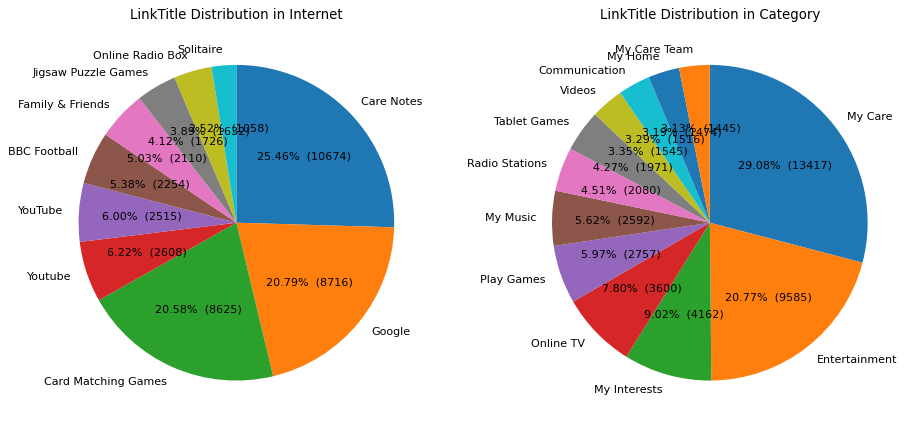

In [20]:
# LinkTitle Distribution in 'Internet' and 'Category'
pic = plt.figure(figsize=(14,7),dpi=80) 

CCDate_2021_Data_ClRole_ClEx_Internet=CCDate_2021_Data_ClRole_ClEx[CCDate_2021_Data_ClRole_ClEx['LinkType']=='Internet']['LinkTitle']
CCDate_2021_Data_ClRole_ClEx_Category=CCDate_2021_Data_ClRole_ClEx[CCDate_2021_Data_ClRole_ClEx['LinkType']=='Category']['LinkTitle']

LinkTitle_counts_Internet = CCDate_2021_Data_ClRole_ClEx_Internet.value_counts()
LinkTitle_counts_Category = CCDate_2021_Data_ClRole_ClEx_Category.value_counts()

LinkTitle_counts_Internet_clean=LinkTitle_counts_Internet[LinkTitle_counts_Internet>1000] #清洗掉过小的数据
LinkTitle_counts_Category_clean=LinkTitle_counts_Category[LinkTitle_counts_Category>1000]

fig1 = pic.add_subplot(1,2,1)
plt.pie(LinkTitle_counts_Internet_clean, labels = LinkTitle_counts_Internet_clean.index, startangle = 90, counterclock = False, autopct=make_autopct(LinkTitle_counts_Internet_clean));
plt.title('LinkTitle Distribution in Internet',fontsize=12)

fig2 = pic.add_subplot(1,2,2)
plt.pie(LinkTitle_counts_Category_clean, labels = LinkTitle_counts_Category_clean.index, startangle = 90, counterclock = False, autopct=make_autopct(LinkTitle_counts_Category_clean));
plt.title('LinkTitle Distribution in Category',fontsize=12)

plt.show()

## Reflect and Hypothesise

 What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world? In short, what hypotheses came up as you explored the data, and how would you go about testing them?

### Reflect

Differences in the basic information of users can lead to significant differences in their behavior on the platform. For example, there are gender differences, with usage varying greatly between genders in some months. As for age, most users older than 70 are primarily served by elderly services, while most services for users younger than 70 are for different medical conditions. Time is also a factor that produces great variation, and the data presented by users can vary greatly from month to month.

The data analyzed in this study is data of the behavior, health, and basic information of users living in Scotland who use the CleverCogs platform. Most of them are disabled or elderly people. By analyzing the behavior of different users at different times on the platform, we can further understand the relationship between users' behavior in the platform, their lifestyle habits, and user features. If the users who use the platform can be used as the sample data of the entire Scottish population with similar features, we might further understand the habits and basic information of the elderly and disabled in Scotland as a whole.


### Hypothesise
####  Hypotheses1: There were events in June that female have more interest, such as discounts on merchandise, resulting in much higher usage by female than male in June.

The 'usage amount' of female users generally a little more than male users'. But in June, the 'usage amount' of female users much more than male users', even more than three times. (Female: 9277, Male: 3614)       
So, maybe there were some events that female user want to do more on the platform.        
Further research may be needed on how user behaviour in June differs from other months, user interviews, asking data holders.

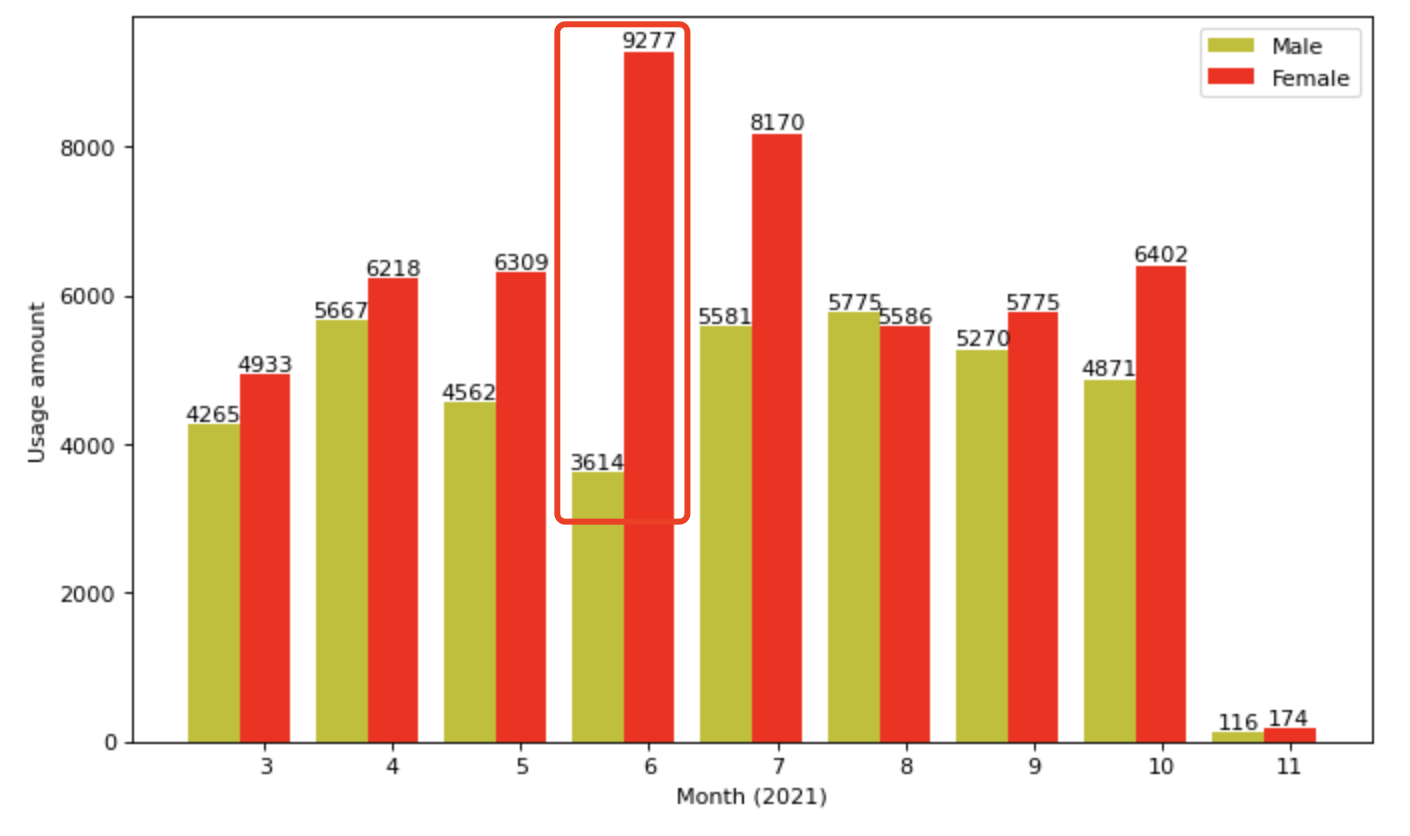


#### Hypotheses2: Healthy elderly people are the largest user group
User who only require 'Elderly Care/support' rank the first (29.59%), maybe the largest user group is healthy elderly people.          
Further research may be needed on asking data holder whether those user are healthy.            
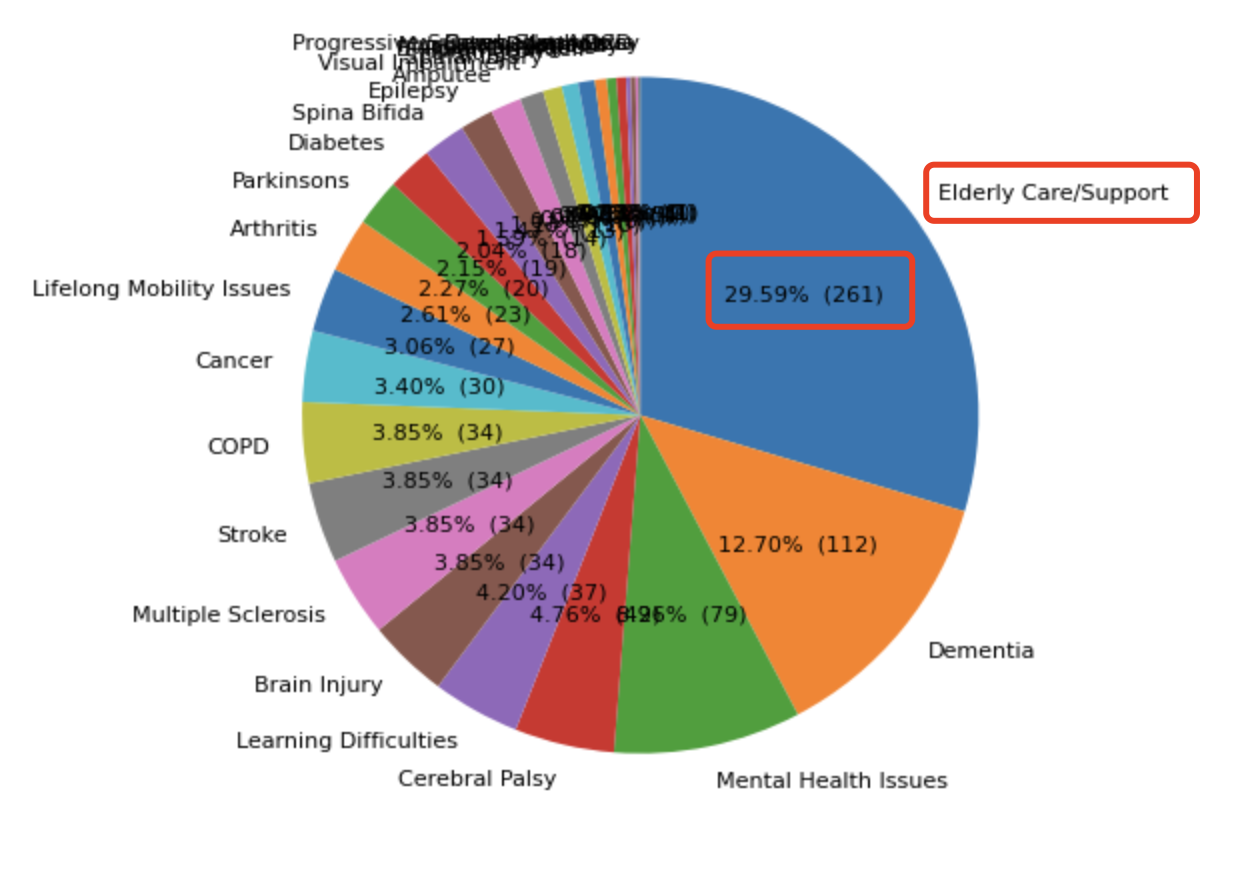

#### Hypotheses3: The user in bigger city are more active?
The five regions with the highest levels of activity are in big city like Edinburgh, Glasgow, etc. So maybe the user in bigger city are more active.          
The reason might be that the larger the city, the greater the user needs and the larger the facilities opened, the more users there will be and so more active.         
Further research may be needed on the city pupolation, CleverCogs' facilities.        
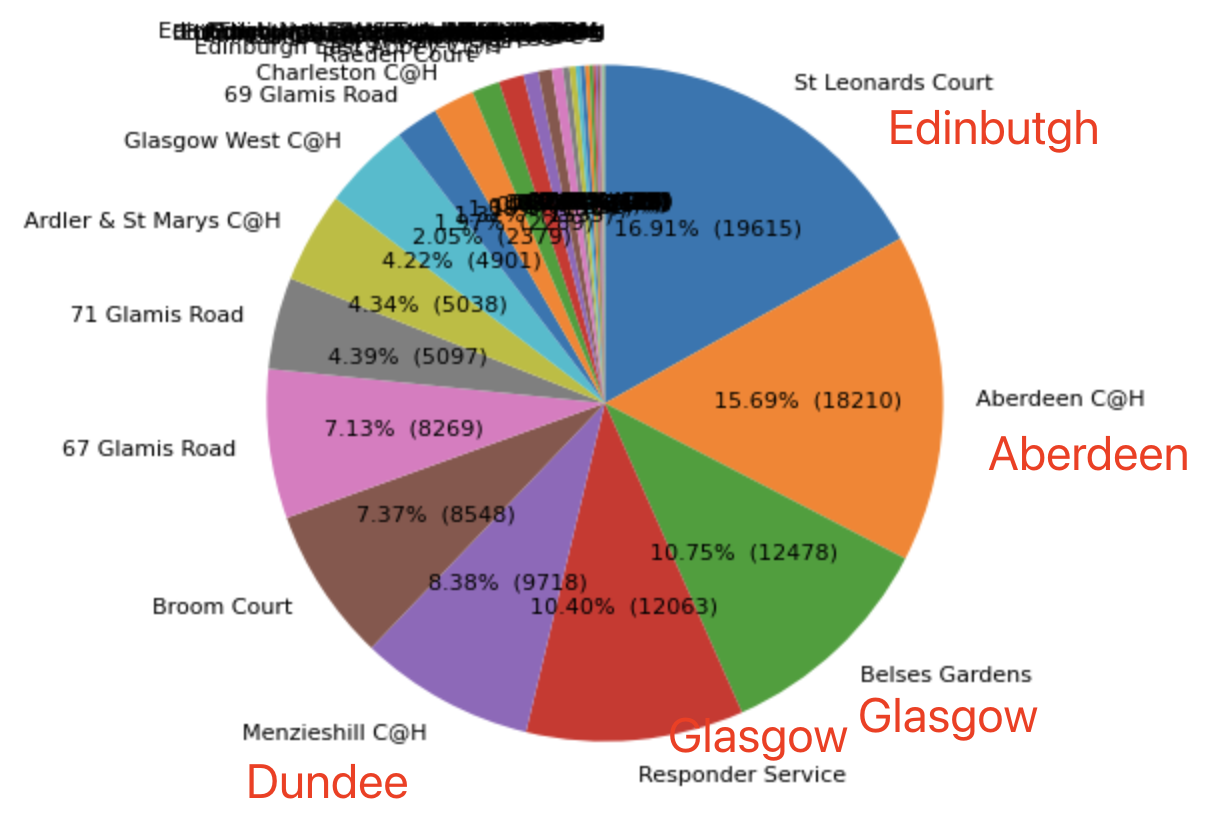

#### Hypotheses4: The reason for the high proportion of 'mental health' among young people is the lockdown
Among the health problems of users younger than 70, 'Mental Health issues' is the most important problem.       
Maybe because the lockdown, people go out or hung out with their friends less often, leading to mental health issues.       
Further research may be needed on comparing with the date before the lockdown.       
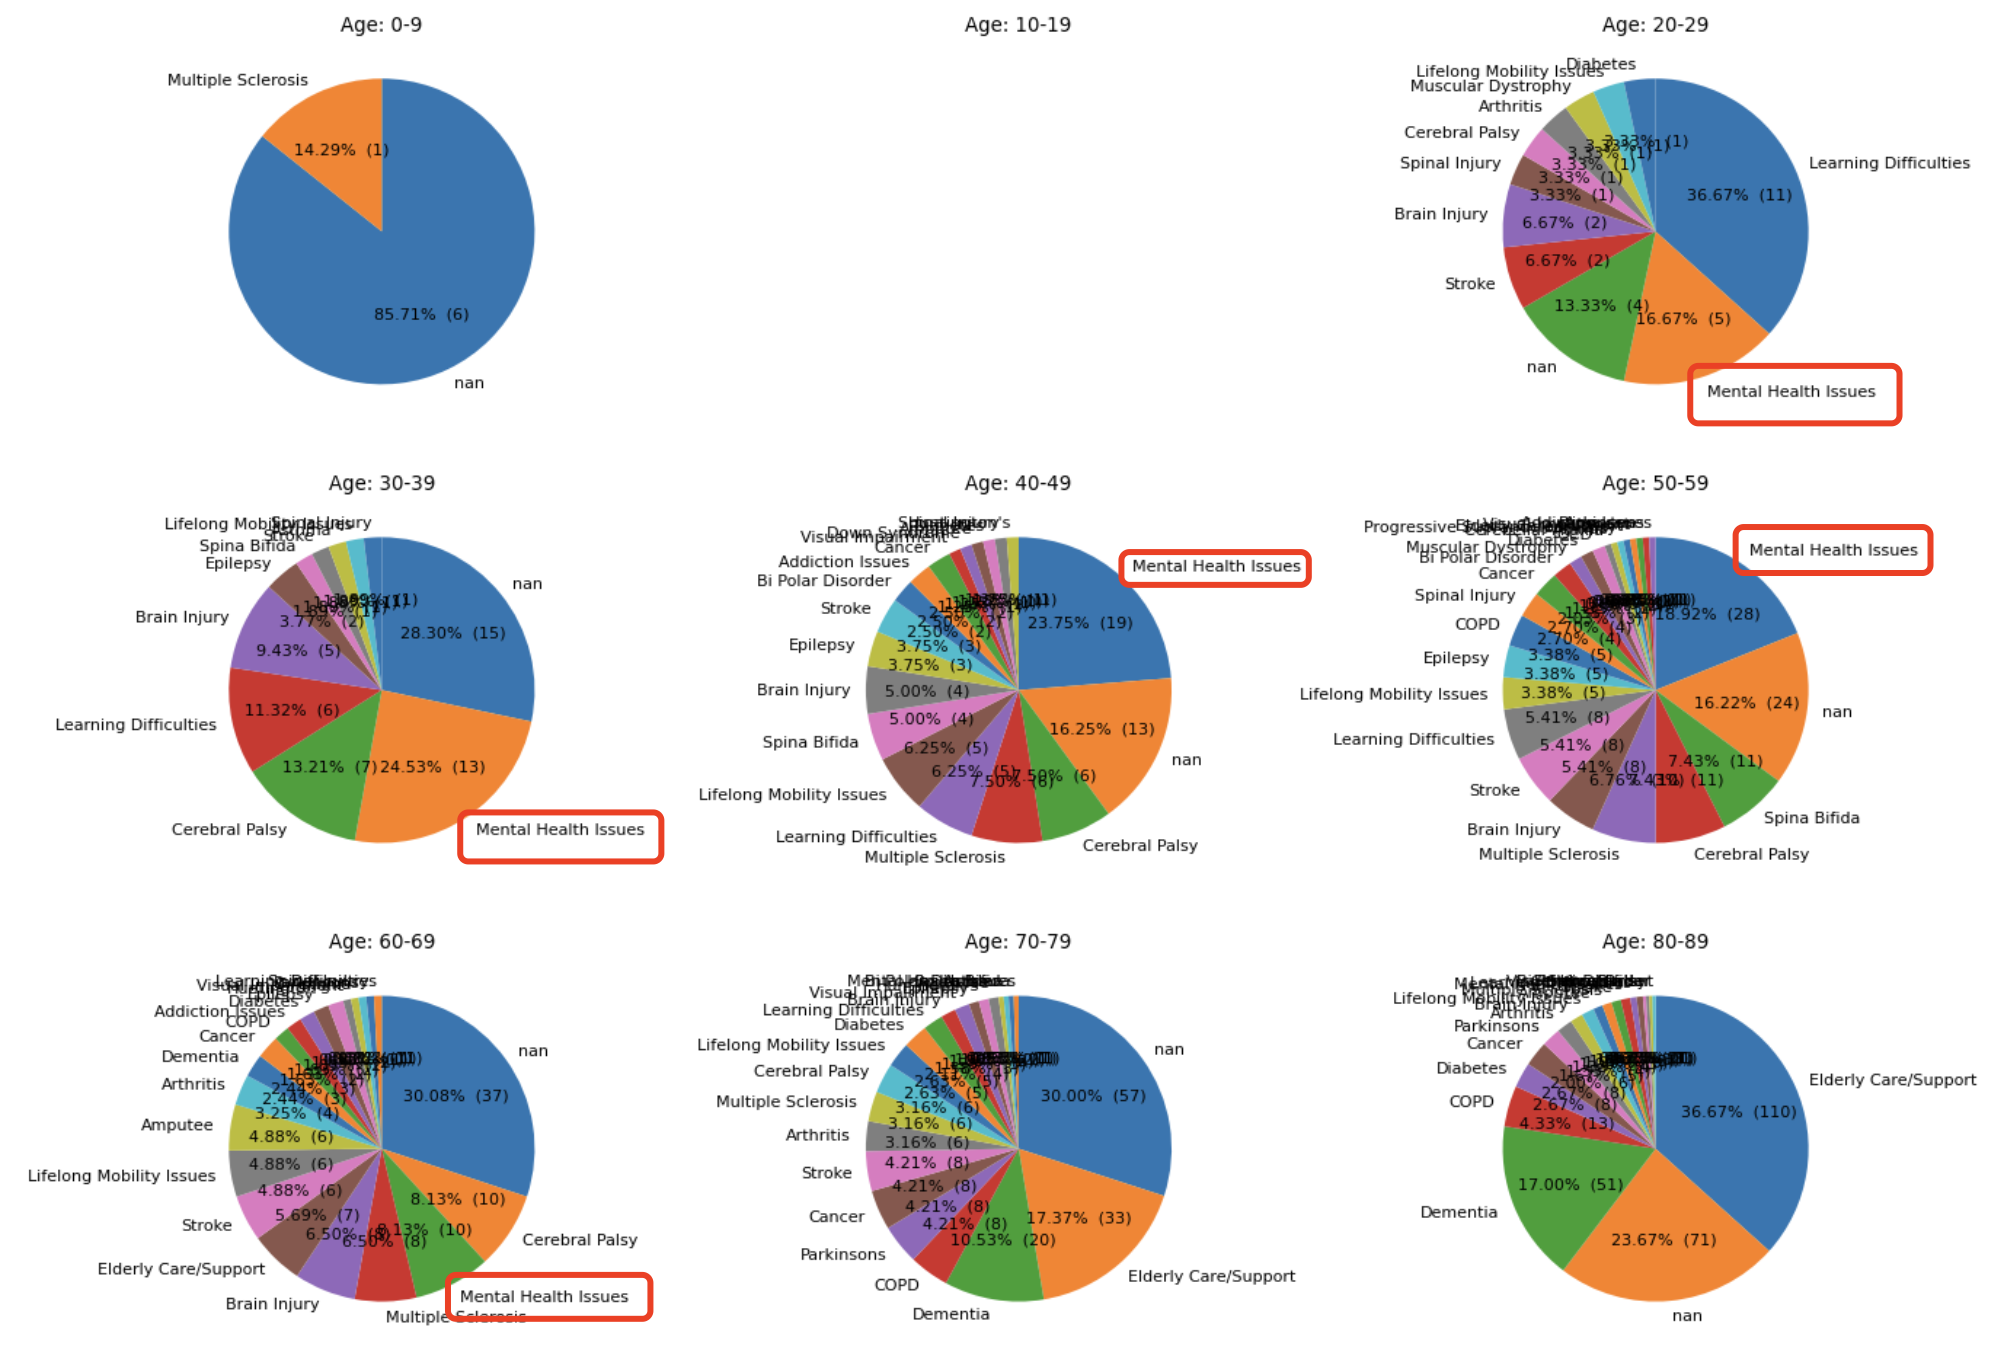

#### Hypotheses5: Users younger than 10 years old may be relatives of staff members
The majority of the data were adults. But there were seven outliers younger than 10 years old and only one of them had a health problem, the remaining six had no health problems. If they are not old or do not have health problem, Why are they become the users of CleverCogs?

Maybe the user younger than 10 years old is relative of staff members, for some kind of convenience to register CleverCogs.

Further research may be needed on know more about these users' behavior, asking data holder. 

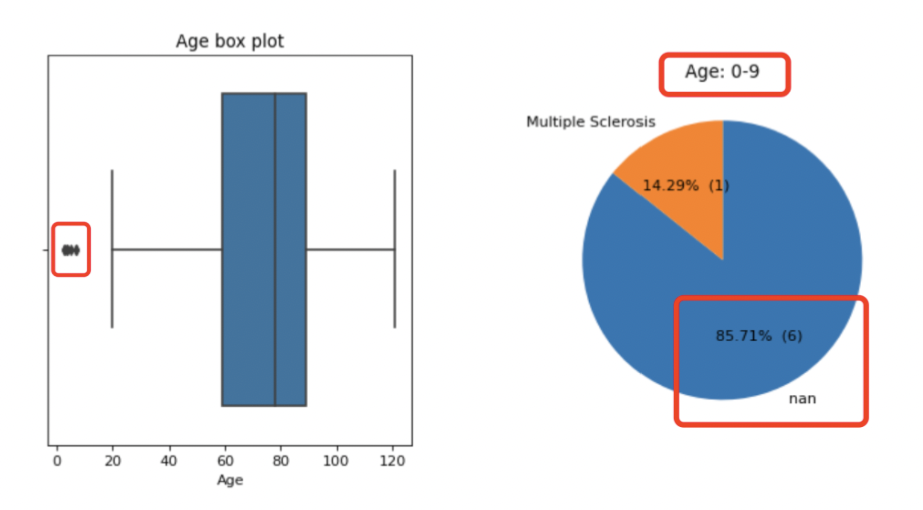